In [68]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [69]:

# Load the data
data = pd.read_csv(r"C:\Users\MY PC\Downloads\iris.csv")
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.shape


(150, 6)

In [71]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [74]:
df.drop("Id",axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
desc=pd.DataFrame(round((df.describe().T),2))
desc

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.05,0.43,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.76,1.76,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


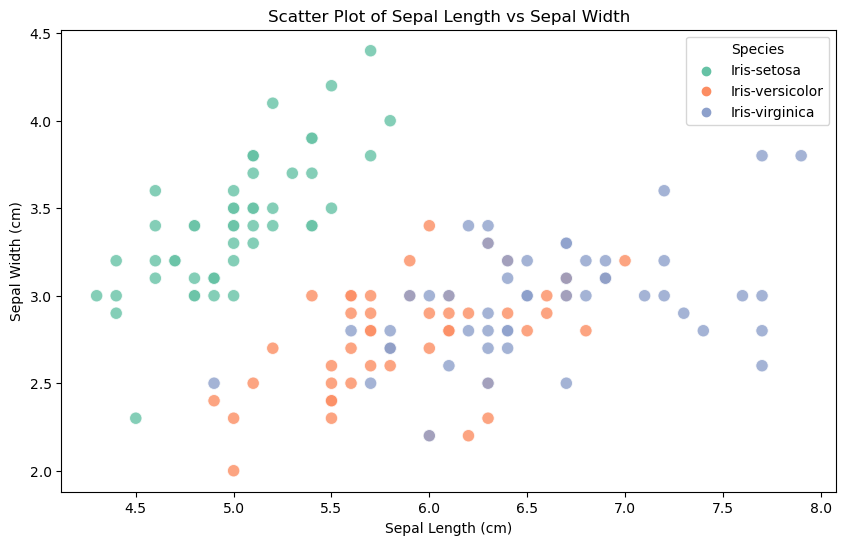

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue="Species", palette="Set2", s=80, alpha=0.8)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Species')
plt.show()

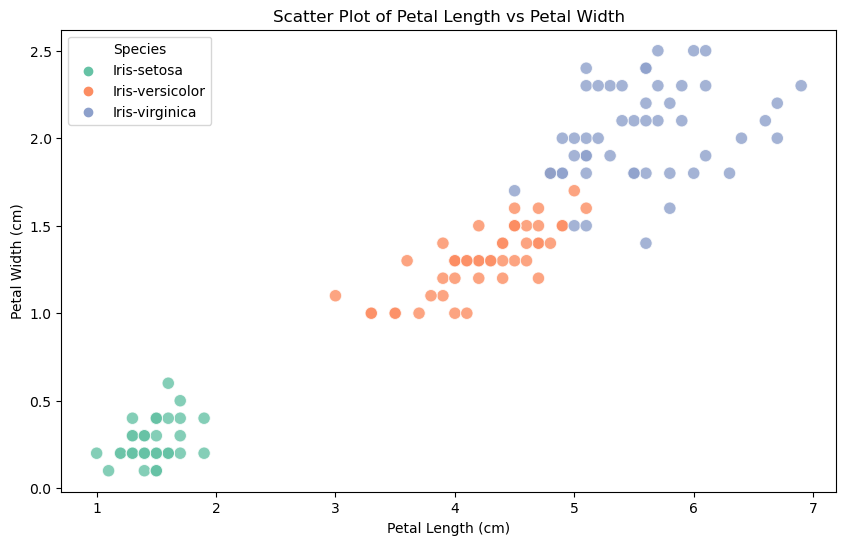

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue="Species", palette="Set2", s=80, alpha=0.8)
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

In [78]:
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [79]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


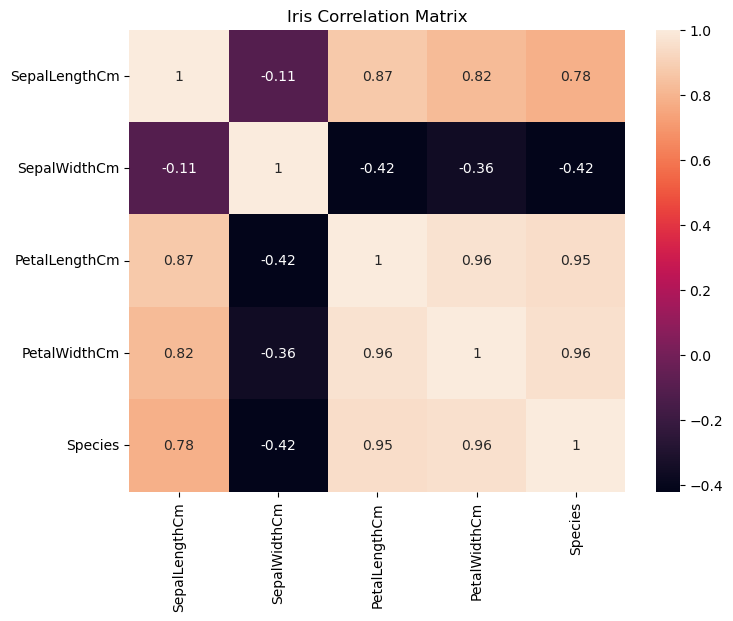

In [80]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="rocket", annot=True)
plt.title("Iris Correlation Matrix")
plt.show()

In [81]:
X=df.drop(["Species"],axis=1)
y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=25)

In [82]:
X_train.shape

(112, 4)

In [83]:
X_test.shape

(38, 4)

In [84]:
y_train.shape

(112,)

In [85]:
y_test.shape

(38,)

In [86]:
models = {
       
    'LogisticRegression': LogisticRegression()
      }
    

In [87]:
accuracy_scores = []
confusion_matrices = []
model_names = []

In [88]:
for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")
    #cross validation 
    cross_val_scores = cross_val_score(model_instance, X, y, cv=5, scoring='accuracy')
    mean_cv_score = round(cross_val_scores.mean(), 3)
    
   
  
    # Fit the model
    model_instance.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_instance.predict(X_test)
    
    # Calculate accuracy score
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)
    
    # Store model names
    model_names.append(model_name)
     # Print results
    print("Cross-Validation Mean Accuracy:", mean_cv_score)
    print("Accuracy Score:", accuracy)
    
    print("Confusion Matrix:\n", cm)
    print("\n")

-----LogisticRegression-----
Cross-Validation Mean Accuracy: 0.973
Accuracy Score: 0.974
Confusion Matrix:
 [[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


